In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\NLP\Data\ML471_S4_Datafile_Concept.csv")

df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

In [4]:
series = df['Consumption']

series = series.dropna()

train_size = int(len(series) * 0.8)
train = series[:train_size]
test = series[train_size:]

model = auto_arima(
    train,
    seasonal=True,
    m=12,
    trace=True,
    suppress_warnings=True,
    stepwise=True
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1363.439, Time=4.70 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1561.800, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1413.742, Time=0.44 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1389.558, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1630.770, Time=0.04 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=1361.464, Time=2.87 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1460.445, Time=0.33 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1363.425, Time=4.86 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1410.788, Time=1.98 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=1364.708, Time=5.55 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1360.401, Time=1.19 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1460.030, Time=0.71 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=1362.315, Time=2.75 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=1362.275, Time=4.92 sec
 ARIMA(1,0,2)(1,1,0

In [5]:
forecast = model.predict(n_periods=len(test))

mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100
rmse = np.sqrt(mean_squared_error(test, forecast))

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)

MAE: 6.687000235923563
MAPE: 4.906826579404607
RMSE: 7.792387967823171


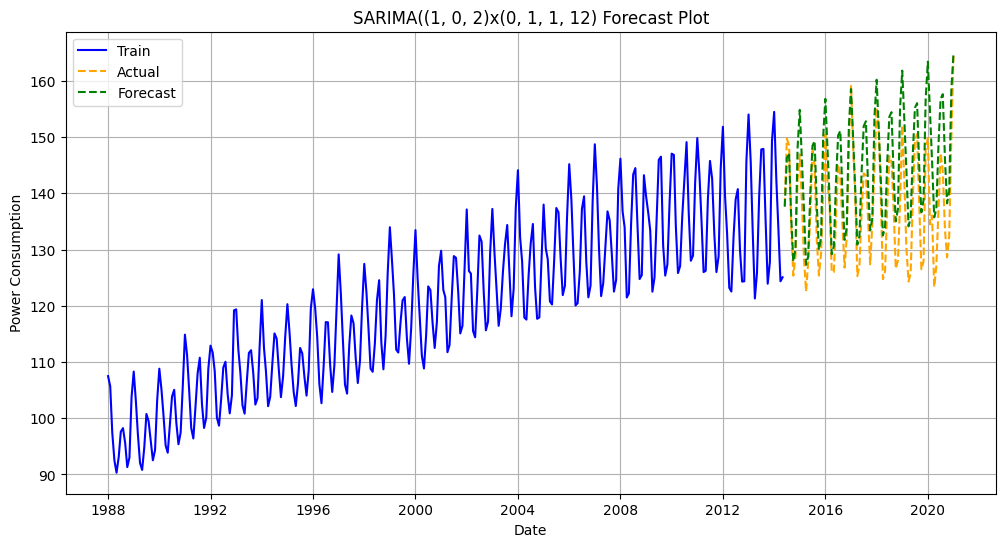

In [6]:
plt.figure(figsize=(12,6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Actual', color='orange', linestyle='--')
plt.plot(test.index, forecast, label='Forecast', color='green', linestyle='--')

plt.title("SARIMA((1, 0, 2)x(0, 1, 1, 12) Forecast Plot")
plt.xlabel("Date")
plt.ylabel("Power Consumption")
plt.legend()
plt.grid(True)
plt.show()